In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the libraries

%matplotlib inline
import numpy as np
import regionmask
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import xcdat as xc
import xarray as xr
import netCDF4
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [3]:
from scipy import stats

In [4]:
import seaborn as sns

In [5]:
mpl.rcParams['font.family'] = 'Droid Sans'
mpl.rcParams['font.size'] = 12
# Edit axes parameters
mpl.rcParams['axes.linewidth'] = 1.5
# Tick properties
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.direction'] = 'out'

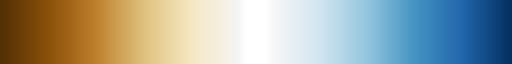

In [6]:
n = 35
diff = 0.5
cmap = plt.cm.BrBG
cmap2 = plt.cm.RdBu
lower = cmap(np.linspace(0, diff, n))
white = np.ones((2, 4))
upper = cmap2(np.linspace(1-diff, 1, n))
colors = np.vstack((lower, white, white, upper))
BrBU = mpl.colors.LinearSegmentedColormap.from_list('map_white', colors)
BrBU

In [7]:
raw = xr.open_dataset('./data/result/raw.nc')
raw

<xarray.Dataset>
Dimensions:  (time: 1380, region: 46, model: 52)
Coordinates:
  * time     (time) datetime64[ns] 1900-01-16T12:00:00 ... 2014-12-16T12:00:00
  * region   (region) int64 0 1 2 3 4 5 6 7 8 9 ... 37 38 39 40 41 42 43 44 45
  * model    (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'obs' 'rean'
Data variables:
    precip   (time, region, model) float64 ...
    nino     (time, region, model) float64 ...
    dmi      (time, region, model) float64 ...

In [8]:
out = xr.open_dataset('./data/result/out_conc.nc')

In [9]:
out['enc'] = out.nino - out.neut
out['lnc'] = out.nina - out.neut
out['asymm'] = (out.enc + out.lnc)/2
out['symm'] = (out.enc - out.lnc)/2

In [10]:
out['asymm_pval'] = xr.where((out.enc_pval > 0.05) & (out.lnc_pval > 0.05), 0, 1)

In [11]:
out

<xarray.Dataset>
Dimensions:      (model: 52, region: 46, season: 5)
Coordinates:
  * model        (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'obs' 'rean'
  * region       (region) object 'Greenland/Iceland' ... 'W.Antarctica'
  * season       (season) object 'ANN' 'DJF' 'MAM' 'JJA' 'SON'
Data variables: (12/18)
    std_dev      (model, region, season) float64 ...
    clim         (model, region, season) float64 ...
    corr_coef    (model, region, season) float64 ...
    pval         (model, region, season) float64 ...
    nino         (model, region, season) float64 ...
    nina         (model, region, season) float64 ...
    ...           ...
    threshold    (model) float64 ...
    enc          (model, region, season) float64 0.3218 0.01204 ... 0.02449
    lnc          (model, region, season) float64 -0.09092 -0.1126 ... -0.08654
    asymm        (model, region, season) float64 0.1155 -0.05029 ... -0.03103
    symm         (model, region, season) float64 0.2064 0.06233 ... 0.05551
    asymm_pval   (model, region, season) int64 0 0 0 0 0 1 1 0 ... 0 0 0 0 1 0 0

## effect of model resolution

In [12]:
import pandas as pd

In [13]:
model_res = pd.read_csv('./util/model_res_table.csv')

In [14]:
model_res

,model,natNomRes atmos,natNomRes Ocean
0,ACCESS-CM2,250.0,100.0
1,ACCESS-ESM1-5,250.0,100.0
2,AWI-CM-1-1-MR,100.0,25.0
3,AWI-ESM-1-1-LR,250.0,50.0
4,BCC-CSM2-MR,100.0,50.0
5,BCC-ESM1,250.0,50.0
6,CAMS-CSM1-0,100.0,100.0
7,CAS-ESM2-0,100.0,100.0
8,CESM2,100.0,100.0
9,CESM2-FV2,250.0,100.0


In [15]:
out.isel(region=37)

<xarray.Dataset>
Dimensions:      (model: 52, season: 5)
Coordinates:
  * model        (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'obs' 'rean'
    region       <U6 'S.Asia'
  * season       (season) object 'ANN' 'DJF' 'MAM' 'JJA' 'SON'
Data variables: (12/18)
    std_dev      (model, season) float64 ...
    clim         (model, season) float64 ...
    corr_coef    (model, season) float64 ...
    pval         (model, season) float64 ...
    nino         (model, season) float64 ...
    nina         (model, season) float64 ...
    ...           ...
    threshold    (model) float64 ...
    enc          (model, season) float64 -0.8625 0.1713 ... -0.3701 -0.1054
    lnc          (model, season) float64 -0.2094 -0.492 -0.2362 ... 0.2451 0.234
    asymm        (model, season) float64 -0.5359 -0.1604 ... -0.0625 0.0643
    symm         (model, season) float64 -0.3266 0.3317 ... -0.3076 -0.1697
    asymm_pval   (model, season) int64 1 1 1 1 1 1 0 1 1 1 ... 1 0 1 1 1 0 0 1 1

In [16]:
corr_bias = out.isel(model=slice(0, -2), region=41, season=0).corr_coef - out.isel(model=-2, region=37, season=0).corr_coef
asymm_bias = out.isel(model=slice(0, -2), region=41, season=0).asymm - out.isel(model=-2, region=37, season=0).asymm

Text(0.5, 1.0, 'E.Australia ANN')

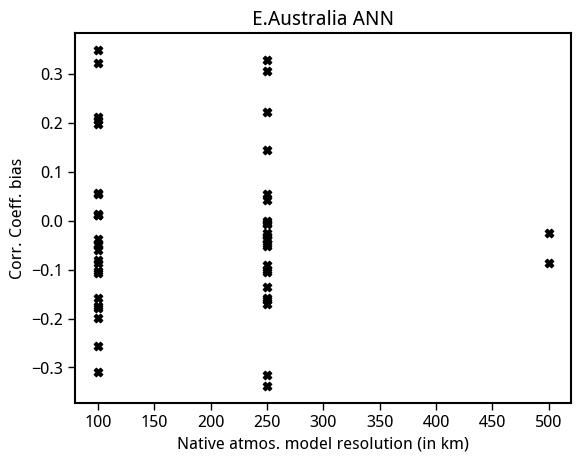

In [17]:
plt.scatter(model_res['natNomRes atmos'], corr_bias, marker='X', color='k')
plt.ylabel('Corr. Coeff. bias')
plt.xlabel('Native atmos. model resolution (in km)')
plt.title('E.Australia ANN')

Text(0.5, 1.0, 'E.Australia ANN')

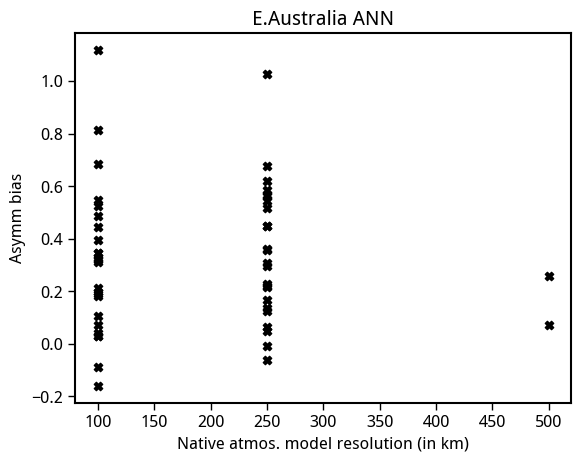

In [18]:
plt.scatter(model_res['natNomRes atmos'], asymm_bias, marker='X', color='k')
plt.ylabel('Asymm bias')
plt.xlabel('Native atmos. model resolution (in km)')
plt.title('E.Australia ANN')

In [19]:
model_res

,model,natNomRes atmos,natNomRes Ocean
0,ACCESS-CM2,250.0,100.0
1,ACCESS-ESM1-5,250.0,100.0
2,AWI-CM-1-1-MR,100.0,25.0
3,AWI-ESM-1-1-LR,250.0,50.0
4,BCC-CSM2-MR,100.0,50.0
5,BCC-ESM1,250.0,50.0
6,CAMS-CSM1-0,100.0,100.0
7,CAS-ESM2-0,100.0,100.0
8,CESM2,100.0,100.0
9,CESM2-FV2,250.0,100.0


In [46]:
####
from dateutil.relativedelta import relativedelta

def reorder(da):
    da['time'] = pd.date_range('1900-01-01', '2015-01-01', freq='1M')

    custom = da.sel(time=da.time.dt.month.isin([6,7,8,9,10,11,12,1,2,3,4,5]))
    # convert cftime to datetime
    datetimeindex = custom.indexes['time']#.to_datetimeindex() 
    # custom['time'] = pd.to_datetime(datetimeindex)
    
    # Add custom group by year functionality
    custom_year = custom['time'].dt.year
    
    # convert time type to pd.Timestamp
    time1 = [pd.Timestamp(i) for i in custom_year['time'].values] 
    # time1 = [pd.Timestamp(i) for i in custom_year['time'].values] 
    
    # Add year to Timestamp objects when month is before Jan. (relativedelta does not work from np.datetime64)
    time2 = [i + relativedelta(years=1) if i.month>=6 else i for i in time1] 
    custom['time'] = time2
    return custom

####


def calc_anom(
    input_da,
    base_start_date: str = "1960-01-01",
    base_end_date: str = "1990-01-01",
    start_year: str = "1900-01-01",
    end_year: str = "2015-01-01",
    # var = "Temperature",
    # units = 'K'
):

    # define the base climatology
    base_clim = input_da.sel(time=slice(base_start_date, base_end_date))

    # calculate the monthly climatology for the base years
#     da_clim_coarsen = base_clim.coarsen(time=12)
    da_clim = base_clim.groupby("time.month").mean("time")
    da_anom = input_da.sel(time = slice(start_year, end_year)).groupby("time.month") - da_clim
    
    return da_anom

####

In [47]:
# Function to preprocess the regridded data

from statsmodels.tsa.seasonal import STL
# import pymannkendall as mk

def detrend1d(arr, period = 9*12):
    res = STL(arr, period = period).fit()
    arr_det = arr - res.trend
    return arr_det
    
def detrend1d_check(arr, period = 9):
    # if np.nansum(arr) != 0:
    #     trend = mk.hamed_rao_modification_test(arr).trend
    # else:
    #     trend = 'no trend'
    # if trend != 'no trend':
    #     res = STL(arr, period = period).fit()
    #     arr_det = arr - res.trend
    #     return arr_det
    # else:
    #     return arr
    res = STL(arr, period = period).fit()
    arr_det = arr - res.trend
    return arr_det

# def detrend_separate(da, period=9):
#     trend = da.rolling(time = period*12).mean('time')
#     da_detrend = da - trend
#     return da_detrend
def detrend_separate(da, dim):
    return xr.apply_ufunc(detrend1d, da, input_core_dims=[[dim]], output_core_dims=[[dim]])
    
def detrend_separate_check(da, dim):
    return xr.apply_ufunc(detrend1d_check, da, input_core_dims=[[dim]], output_core_dims=[[dim]])

In [15]:
from scipy import stats

In [16]:
skw_res = xr.open_dataset('./data/result/skw.nc')

In [53]:
pra_obs = calc_anom(raw.isel(model = -2, region=41).precip)
skw_obs = skw_res.isel(region = 41).sel(season='ANN', model='obs').pr_skw
asymm_obs = out.isel(region=41).sel(season='ANN', model='obs').asymm
prd_obs = detrend_separate_check(reorder(pra_obs).groupby('time.year').mean('time'), dim='year').sel(year = slice('1900', '2015'))

In [54]:
pra_hr = calc_anom(raw.isel(region=41).sel(model = 'HadGEM3-GC31-MM').precip)
skw_hr = skw_res.isel(region = 41).sel(model = 'HadGEM3-GC31-MM', season='ANN').pr_skw
asymm_hr = out.isel(region=41).sel(model = 'HadGEM3-GC31-MM', season='ANN').asymm
prd_hr = detrend_separate_check(reorder(pra_hr).groupby('time.year').mean('time'), dim='year').sel(year = slice('1900', '2015'))

In [99]:
pra_hr2 = calc_anom(raw.isel(region=41).sel(model = 'CNRM-CM6-1-HR').precip)
skw_hr2 = skw_res.isel(region = 41).sel(model = 'CNRM-CM6-1-HR', season='ANN').pr_skw
asymm_hr2 = out.isel(region=41).sel(model = 'CNRM-CM6-1-HR', season='ANN').asymm
prd_hr2 = detrend_separate_check(reorder(pra_hr2).groupby('time.year').mean('time'), dim='year').sel(year = slice('1900', '2015'))

In [55]:
pra_lr = calc_anom(raw.isel(region=41).sel(model = 'CanESM5').precip)
skw_lr = skw_res.isel(region = 41).sel(model = 'CanESM5', season='ANN').pr_skw
asymm_lr = out.isel(region=41).sel(model = 'CanESM5', season='ANN').asymm
prd_lr = detrend_separate_check(reorder(pra_lr).groupby('time.year').mean('time'), dim='year').sel(year = slice('1900', '2015'))

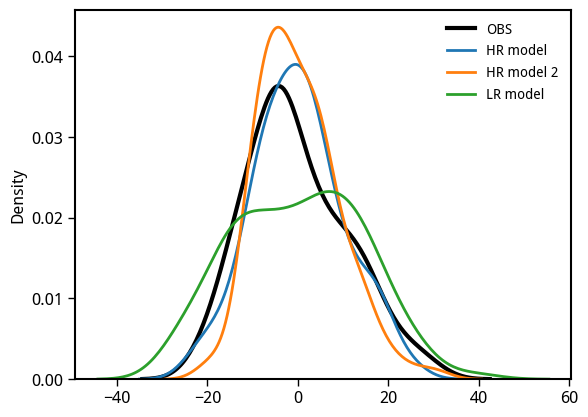

In [102]:
sns.kdeplot(prd_obs, lw = 3.0, label = 'OBS', color='k')
sns.kdeplot(prd_hr, lw = 2.0, label = 'HR model')
sns.kdeplot(prd_hr2, lw = 2.0, label = 'HR model 2')
# sns.kdeplot(prd_hr2, lw = 2.0, label = 'HR model')
sns.kdeplot(prd_lr, lw = 2.0, label = 'LR model')
plt.legend(frameon=False, fontsize=10)

In [103]:
skw_obs.values, skw_hr.values, skw_hr2.values, skw_lr.values

(array(0.47465978), array(0.16147503), array(0.65148446), array(0.0731441))

In [104]:
asymm_obs.values, asymm_hr.values, asymm_hr2.values, asymm_lr.values

(array(0.49228247), array(0.69465175), array(0.19304193), array(-0.04551853))

In [ ]:
# for all regions

In [91]:
asymm_obs_all_reg = out.sel(season='ANN', model='obs').asymm
asymm_hr_all_reg = out.sel(model = 'HadGEM3-GC31-MM', season='ANN').asymm
asymm_lr_all_reg = out.sel(model = 'CanESM5', season='ANN').asymm

In [92]:
skw_obs_all_reg = skw_res.sel(season='ANN', model='obs').pr_skw
skw_hr_all_reg = out.sel(model = 'HadGEM3-GC31-MM', season='ANN').asymm
skw_lr_all_reg = out.sel(model = 'CanESM5', season='ANN').asymm

([<matplotlib.axis.XTick at 0x7f742b180970>,
 [Text(1, 0, 'HR model'), Text(2, 0, 'LR model')])

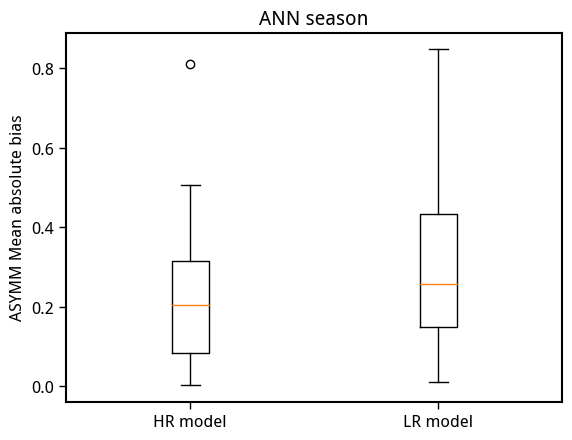

In [93]:
plt.boxplot([np.abs(asymm_hr_all_reg[:-2] - asymm_obs_all_reg[:-2]), np.abs(asymm_lr_all_reg[:-2] - asymm_obs_all_reg[:-2])])
plt.ylabel('ASYMM Mean absolute bias')
plt.title('ANN season')
plt.xticks(ticks = [1, 2], labels = ['HR model', 'LR model'])

([<matplotlib.axis.XTick at 0x7f742b16f940>,
 [Text(1, 0, 'HR model'), Text(2, 0, 'LR model')])

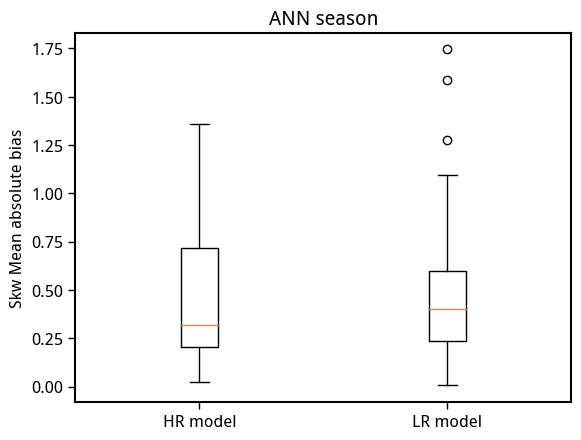

In [94]:
plt.boxplot([np.abs(skw_hr_all_reg[:-2] - skw_obs_all_reg[:-2]), np.abs(skw_lr_all_reg[:-2] - skw_obs_all_reg[:-2])])
plt.ylabel('Skw Mean absolute bias')
plt.title('ANN season')
plt.xticks(ticks = [1, 2], labels = ['HR model', 'LR model'])

In [96]:
# using a HR and LR model to compare the effects of downscaling -> HadGEM3-GC31-MM and CNRM-CM6-1-HR [checking the effect on rainfall distribution]

In [13]:
def preproc_non_regridded(file_location):
    variants_used = ['r1i1p1f1', 'r1i1p1f2' 'r1i1p1f3']
    # sst = xr.open_mfdataset(f'{file_location}')#.load()
    precip = xr.open_mfdataset(f'{file_location}')#.load()

    # sst_anom, sst_base = calc_anom(sst.tos)
    # nino_anom = sst_anom.sel(lat = slice(-5, 5), lon = slice(-170, -120)).mean(('lat', 'lon'))
    # anom_wio = sst_anom.sel(lat = slice(-10, 10), lon = slice(50, 70)).mean(["lat", "lon"])
    # anom_eio = sst_anom.sel(lat = slice(-10, 0), lon = slice(90, 110)).mean(["lat", "lon"])
    # dmi = anom_wio - anom_eio

    # detrending
    # precip_anom_resid = detrend_separate(precip_anom)
    # nino34 = detrend_separate(nino_anom.load(), 'time').rolling(time=3).mean('time')
    # threshold = nino34.std('time')
    # sst_anom_resid = detrend_separate(sst_anom)
    
    # load the data into memory
    precip_mon = (precip.pr*86400*30).sel(time = slice('1900-01-01', '2015-01-01')).load()
    # precip_mon['time'] = nino34['time']
    # dmi = dmi.load()
    # rename stuff
    precip_mon.name = 'precip'
    # nino34.name = 'nino'
    # dmi.name = 'dmi'
    return precip_mon

In [51]:
# precip_orig = preproc_non_regridded('/g/data/oi10/replicas/CMIP6/CMIP/MOHC/HadGEM3-GC31-MM/historical/r1i1p1f3/Amon/pr/gn/v20191207/*.nc')
precip_orig = preproc_non_regridded('/g/data/oi10/replicas/CMIP6/CMIP/CNRM-CERFACS/CNRM-CM6-1-HR/historical/r1i1p1f2/Amon/pr/gr/v20191021/*.nc')

In [52]:
precip_orig = precip_orig.sel(time = slice('1900', '2015'))
precip_orig = precip_orig.assign_coords({"lon": (((precip_orig.lon + 180) % 360) - 178.5)})
precip_orig = precip_orig.sortby(precip_orig.lon)

In [53]:
land_mask = regionmask.defined_regions.natural_earth_v5_0_0.land_10.mask_3D(precip_orig, wrap_lon=False, drop=True)
land_mask

<xarray.DataArray 'mask' (region: 1, lat: 360, lon: 720)>
array([[[ True,  True,  True, ...,  True, False, False],
        [ True,  True,  True, ...,  True, False, False],
        [ True,  True,  True, ...,  True, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])
Coordinates:
  * lat      (lat) float64 -89.62 -89.12 -88.62 -88.13 ... 88.62 89.12 89.62
  * lon      (lon) float64 -178.5 -178.0 -177.5 -177.0 ... 180.0 180.5 181.0
  * region   (region) int64 0
    abbrevs  (region) <U3 'lnd'
    names    (region) <U4 'land'

In [54]:
precip_land = precip_orig.where(land_mask.isel(region=0))

In [55]:
ar6_mask = regionmask.defined_regions.ar6.land.mask_3D(precip_land, wrap_lon=False, drop=False)
precip_naus = precip_land.where(ar6_mask.isel(region=41))

In [56]:
weights = np.cos(np.deg2rad(precip_naus.lat))
weights.name = 'weights'
# reorder the vars
precip_naus_mean = precip_naus.weighted(weights).mean(('lat', 'lon'))

Text(0.5, 1.0, 'N. Australia ANN')

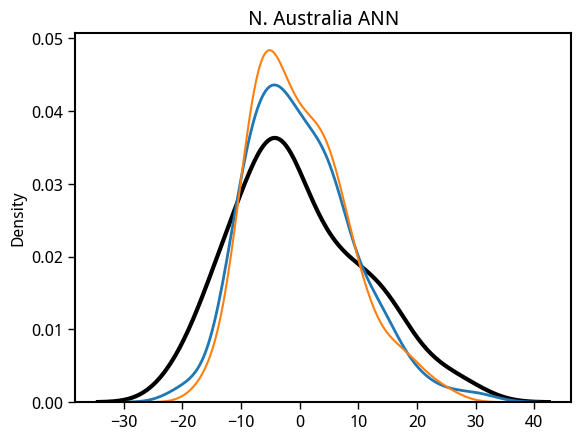

In [58]:
obs_dist = detrend_separate_check(reorder(calc_anom(raw.precip.isel(region=41).sel(model = 'obs'))).groupby('time.year').mean('time'), dim='year').sel(year=slice('1900', '2015'))
# hr_dist = detrend_separate_check(reorder(calc_anom(raw.precip.isel(region=41).sel(model = 'HadGEM3-GC31-MM'))).groupby('time.year').mean('time'), dim='year').sel(year=slice('1900', '2015'))
hr_dist = detrend_separate_check(reorder(calc_anom(raw.precip.isel(region=41).sel(model = 'CNRM-CM6-1-HR'))).groupby('time.year').mean('time'), dim='year').sel(year=slice('1900', '2015'))
lr_dist = detrend_separate_check(reorder(calc_anom(precip_naus_mean)).groupby('time.year').mean('time'), dim='year').sel(year=slice('1900', '2015'))

sns.kdeplot(obs_dist, color='k', lw=3.0, label = 'OBS')
sns.kdeplot(hr_dist, lw=2.0, label='Original HR model')
sns.kdeplot(lr_dist, label = 'regridded HR model')
plt.title('N. Australia ANN')

## ITCZ analysis

In [44]:
base_loc = '/g/data/ob22/as8561/data/regridded_models/'
precip = xr.open_dataset(base_loc + 'ACCESS-ESM1-5/precip.nc').precip.sel(time = slice('1900', '2015'))#.load()
precip = precip.assign_coords({"lon": (((precip.lon + 180) % 360) - 178.5)})
precip = precip.sortby(precip.lon)
precip

FileNotFoundError: [Errno 2] No such file or directory: b'/g/data/ob22/as8561/data/preproc/ACCESS-ESM1-5/precip.nc'

In [ ]:
def extract_results_parallel(precip):
    weights = np.cos(np.deg2rad(precip.lat))
    weights.name = 'weights'
    # reorder the vars

    precip = precip.sel(lat = slice(-15, 15), lon = slice).weighted(weights).mean(('lat', 'lon'))
    return precip.to_numpy(), precip.to_numpy(), precip.to_numpy()


def calc_data_res_parallel(params):
    base_loc = '/scratch/ob22/as8561/data/preproc/'
    model = params[0]
    region = params[1]
    # get all the data
    precip = xr.open_dataset(base_loc + f'{model}/precip.nc').precip.sel(time = slice('1900', '2015'))#.load()
    precip = precip.assign_coords({"lon": (((precip.lon + 180) % 360) - 178.5)})
    precip = precip.sortby(precip.lon)
    #
    nino34 = xr.open_dataset(base_loc + f'{model}/nino.nc').nino.sel(time = slice('1900', '2015'))#.load()
    dmi = xr.open_dataset(base_loc + f'{model}/dmi.nc').dmi.sel(time = slice('1900', '2015'))#.load()
    # mask the land area firt
    land_mask = regionmask.defined_regions.natural_earth_v5_0_0.land_10.mask_3D(precip, wrap_lon=False, drop=False)
    precip_land = precip.where(land_mask.isel(region=0))
    # mask for the ar6 land regions
    ar6_mask = regionmask.defined_regions.ar6.land.mask_3D(precip_land, wrap_lon=False, drop=False)
    # ar6_list = regionmask.defined_regions.ar6.land.to_dataframe()['names'].to_numpy()
    out_precip, out_nino, out_dmi = extract_results_parallel(precip_land.where(ar6_mask.isel(region=region)), nino34, dmi)
    return out_precip, out_nino, out_dmi